In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# base_dir = "/content/drive/My Drive/SchneiderProducts_new/"
# train_data_dir = "/content/drive/My Drive/SchneiderProducts_new/train"
# test_data_dir = "/content/drive/My Drive/SchneiderProducts_new/test"


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wGiKLpbLCZM97n9aUQ_LDwrnJyWJ9s0ouKZiqFJ2TvuRp4_nL4jJJ8
Mounted at /content/drive


In [37]:
import os
base_dir = os.getcwd()
train_data_dir = os.path.join(base_dir , 'Products', 'train')
test_data_dir = os.path.join(base_dir , 'Products', 'test')

In [38]:
import tensorflow as tf

In [71]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
BATCH_SIZE = 32
IMG_SHAPE = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)
baseModel = tf.keras.applications.InceptionResNetV2(
    weights = 'imagenet',
    include_top = False,
    input_shape=IMG_SHAPE
)

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step


In [72]:
baseModel.trainable = False

model = tf.keras.Sequential(
    [
     baseModel,
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1024, activation="relu"),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(7, activation="softmax")]
)

     tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=IMG_SHAPE),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPooling2D(3,3),
     tf.keras.layers.Dropout(0.25),


     tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Dropout(0.25),


     tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Dropout(0.25),

In [73]:
trainDatagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,
   horizontal_flip = True,
   width_shift_range=0.2,
   height_shift_range=0.2,
   rotation_range=15,
   vertical_flip=True,
   fill_mode='reflect',
   data_format='channels_last',
   brightness_range=[0.5, 1.5])

testDatagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,
   horizontal_flip = True,
   width_shift_range=0.2,
   height_shift_range=0.2,
   rotation_range=15,
   vertical_flip=True,
   fill_mode='reflect',
   data_format='channels_last',
   brightness_range=[0.5, 1.5])

In [74]:
model.compile(optimizer=tf.keras.optimizers.Adam(3e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_resnet_v2             │ (None, 5, 5, 1536)     │    54,336,736 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 38400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │    39,322,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_205         │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,670,631 (357.33 MB)

 Trainable params: 39,331,847 (150.04 MB)

 Non-trainable params: 54,338,784 (207.29 MB)

In [77]:
train_generator = trainDatagen.flow_from_directory(
        train_data_dir,
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=BATCH_SIZE
        )

test_generator = testDatagen.flow_from_directory(
    test_data_dir,
    target_size = (IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size = BATCH_SIZE
    )



Found 64 images belonging to 7 classes.
Found 17 images belonging to 7 classes.


In [91]:
test_generator

In [78]:
history = model.fit(train_generator, epochs = 20, validation_data=test_generator)

Epoch 1/20


c:\Users\sesa407973\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.3229 - loss: 2.3661 - val_accuracy: 0.7059 - val_loss: 2.4125
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8021 - loss: 0.7069 - val_accuracy: 0.6471 - val_loss: 5.5645
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.8333 - loss: 0.6828 - val_accuracy: 0.6471 - val_loss: 5.6136
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.8438 - loss: 0.2906 - val_accuracy: 0.7647 - val_loss: 4.1523
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.8854 - loss: 0.1860 - val_accuracy: 0.7059 - val_loss: 3.9809
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9479 - loss: 0.2799 - val_accuracy: 0.7647 - val_loss: 4.3186
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.8646 - loss: 0.3082 - val_accuracy: 0.7059 - val_loss: 4.8320
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.9062 - loss: 0.2379 - val_accuracy: 0.7647 - val_loss: 3.6183
Epoch 9/20
2/2 ━━━━━━━━━━━

In [79]:
layer_outputs = [layer.output for layer in model.layers[0:]]
layer_outputs
##model1 = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)


[<KerasTensor shape=(None, 5, 5, 1536), dtype=float32, sparse=False, name=keras_tensor_1697>,
 <KerasTensor shape=(None, 38400), dtype=float32, sparse=False, name=keras_tensor_1700>,
 <KerasTensor shape=(None, 1024), dtype=float32, sparse=False, name=keras_tensor_1701>,
 <KerasTensor shape=(None, 1024), dtype=float32, sparse=False, name=keras_tensor_1702>,
 <KerasTensor shape=(None, 1024), dtype=float32, sparse=False, name=keras_tensor_1703>,
 <KerasTensor shape=(None, 7), dtype=float32, sparse=False, name=keras_tensor_1704>]

In [80]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [81]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [82]:
import matplotlib.pyplot as plt

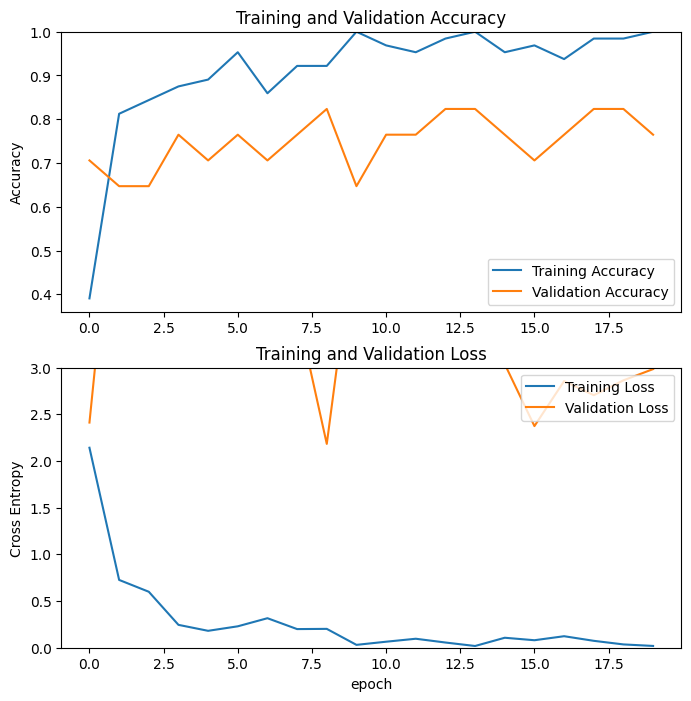

In [83]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [85]:
name = "SchneiderProducts_3rdFeb_inceptionResNet"

In [86]:
model.save(base_dir+name+'.h5')

In [88]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

See the following https://www.tensorflow.org/lite/convert

In [89]:
tflite_model = converter.convert()
open(base_dir+name+".tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\SESA40~1\AppData\Local\Temp\tmpbu4f9m1v\assets


INFO:tensorflow:Assets written to: C:\Users\SESA40~1\AppData\Local\Temp\tmpbu4f9m1v\assets


Saved artifact at 'C:\Users\SESA40~1\AppData\Local\Temp\tmpbu4f9m1v'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_1698')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  1937628428624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1937628425936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1937628424592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1937628419600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1937628429200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1937628426512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1937628421520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1937628422672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1934953387344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1934953392144: TensorSpec(shape=(), dtype=tf.resource, name=None)

374592780

In [90]:
from tensorflow.keras.models import load_model
model = load_model(base_dir+name+".h5")
# model._make_predict_function()
print("Model Loaded")

ValueError: Unknown layer: 'CustomScaleLayer'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [63]:
validation_directory = testDatagen.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=16)

Found 17 images belonging to 7 classes.


In [64]:
filepath_list = validation_directory.filepaths

In [65]:
labels_list = validation_directory.class_indices

In [66]:
# Inverse the Labels with Keys
labels_list = dict((v,k) for k,v in labels_list.items())

In [68]:
def predict_image(image_path):
    image = Image.open(image_path)
    # Resize the image to 224, 224, so that our model can understand it.
    image = image.resize((224, 224))
    images.append(image)
    #Convert the image to Array (Flatten the image)
    image_array = np.array(image)
    # Normalize the image to the values between 0 to 1 (i.e is the reason we are dividing by 255)
    normalized_image_array = image_array / 255.0
    #Create a 3 dimentional array of 224,224 with 3 channels.
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    data[0] = normalized_image_array
    prediction = model.predict(data)
    # Get the Max of the Prediction array and find the Label name from the Labels List and append to the labels predicted list.
    labels_predicted.append(labels_list[np.argmax(prediction)])
    accuray.append(prediction[0][np.argmax(prediction)])

In [69]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
images = []
labels_predicted = []
accuray = []
i = 0
filepaths = validation_directory.filepaths
for imagepath in filepaths:
    predict_image(imagepath)
    accuray[i]
    labels_predicted[i]
    i = i + 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Index out of range


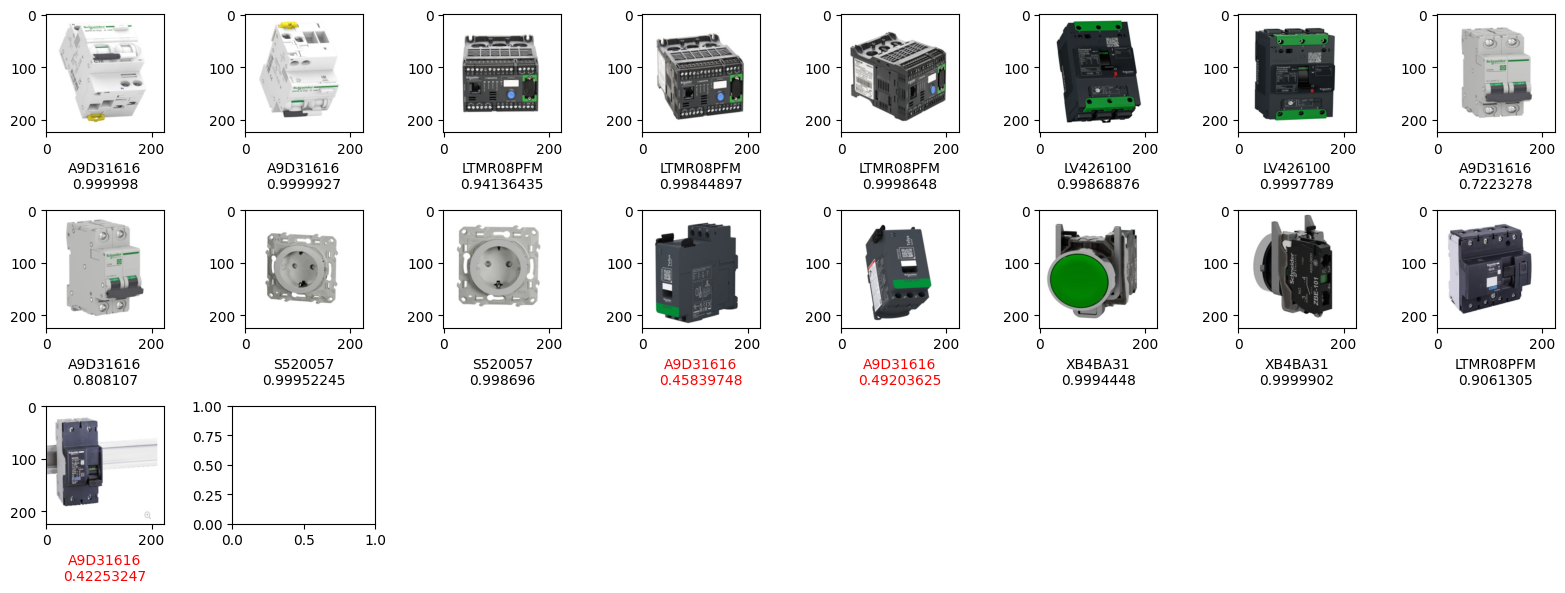

In [70]:
num_cols = 8
num_images = len(images)
num_rows = round(num_images/num_cols) + 1
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i+1)
    try:
        plt.imshow(images[i])
        label = plt.xlabel(labels_predicted[i] +  "\n" + str(accuray[i]))
        if accuray[i] < 0.7 :
            label.set_color('red')
    except IndexError:
        print("Index out of range")
        break
plt.tight_layout()
plt.show()
